<a href="https://colab.research.google.com/github/kocice/churn-prediction/blob/main/banque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
fichier_url = "https://raw.githubusercontent.com/kocice/churn-prediction/main/Dataset.csv"
# data = pd.read_csv("Dataset.csv", sep=";", na_values="Unknown")
data = pd.read_csv(fichier_url, sep=";", na_values="Unknown")

In [6]:
df = data.copy()

In [7]:
df.drop('CLIENTNUM', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [8]:
df["Attrition_Flag"].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Nous avons deux modalités pour la variable cible `Attrition_Flag`

- **Existing Customer**: 0
- **Attrited Customer**: 1

***On remarque une forte inegalité entre les proportions des modalités***

### Pourcentage de données manquantes par variable

In [9]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

Il n'y a pas de valeur manquante dans les variables quantitatives.

Seule trois variables possèdent des donnés manquante dont le pourcentage est inférieur à 15%

In [10]:
df_line = df.shape
# Récupperer le nombre de lignes manquantes
index_with_nan = df.index[df.isnull().any(axis=1)]
nbr_df_nan = len(np.array(index_with_nan).reshape(-1, 1))
print(f"Ligne du dataframe: {df_line[0]}")
print(f"Nombre de ligne manquante: {nbr_df_nan} \nRatio de ligne manquante: {(nbr_df_nan/df_line[0])*100}")

Ligne du dataframe: 10127
Nombre de ligne manquante: 3046 
Ratio de ligne manquante: 30.07800928211711


In [11]:
# Suppresion des données manquantes
df.drop(index_with_nan, 0, inplace=True)
df.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


7081

In [12]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Il n' y a plus de données manquantes Dataset

# Prétraitement
### Donnée entraînement et de test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [15]:
# On fait une découpe en respectant la repartition des données
train = trainset['Attrition_Flag'].value_counts(normalize=True)
test = testset['Attrition_Flag'].value_counts(normalize=True)
print(f"Donnée d'entrainement:\n{train}\n\n")
print(f"Donnée de test:\n{test}")

Donnée d'entrainement:
Existing Customer    0.839548
Attrited Customer    0.160452
Name: Attrition_Flag, dtype: float64


Donnée de test:
Existing Customer    0.852626
Attrited Customer    0.147374
Name: Attrition_Flag, dtype: float64


### Encodage des variable qualitatives ordinales

In [16]:

def encode_features_ordinal(dataframe):
    '''
    Fonction permetant d'encoder des variables qualitatives ordinales
    :param dataframe: Fournir un dataframe
    :param variable: Fournir la liste de variable
    '''
    features_ordinals = ['Education_Level', 'Income_Category', 'Card_Category']
    modalite = {
    'Uneducated': 0,
    'College': 1,
    'High School': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
    }
    for col in features_ordinals:
        if dataframe[col].dtype == object:
            dataframe.loc[:,col] = dataframe[col].map(modalite)
    
    return dataframe

In [17]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### Encodage des variable qualitatives nominales

In [18]:
def encodin_nominale(datframe):
    """
    Fonction permetant de faire l'encodage des varibles qualitative nominale 
    en supprimant la variable dependante
    """
    features_nominals = ['Marital_Status', 'Gender']
    
    for var in features_nominals:
        if datframe[var].dtypes == 'object':
            modalite = datframe[var].unique()
            for index, mod in enumerate(modalite):
                if index == 0:
                    continue
                datframe[mod] = np.where(datframe[var]==mod, 1, 0)
            datframe.drop(columns=var,axis=1,inplace=True)
            
    return datframe

### Normalisation des variables qualitatives

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [20]:
from sklearn.compose import ColumnTransformer

In [21]:
def getNumericFeatures():
    numeric_features = []
    for col in df.columns:
        if df[col].dtypes == "int64" or df[col].dtypes == "float64":
            numeric_features.append(col)

    return numeric_features

In [22]:
df_test = df.copy()

In [23]:
numeric_features = getNumericFeatures()

# nous appliquons à ces colonnes une transformation
numeric_transformer = StandardScaler()

# on combine toutes ces informations dans un objet de la
# classe ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ]
)

In [24]:
def preprocessing(dataframe):
    
    Y = dataframe['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    X = dataframe.drop('Attrition_Flag', axis=1)
    
    X = encode_features_ordinal(X)
    X = encodin_nominale(X)
    
    return X, Y
 

In [25]:
X_train, Y_train = preprocessing(trainset)
# on applique les transformations sur toutes les colonnes
X_train[numeric_features] = preprocessor.fit_transform(X_train)

In [26]:
X_test, Y_test = preprocessing(testset)
X_test[numeric_features] = preprocessor.transform(X_test)

# Modelisation & Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
log = LogisticRegression(random_state=0)
# model_tree = DecisionTreeClassifier(random_state=0)
model_svc = SVC(random_state=0)
model_boost = AdaBoostClassifier(random_state=0)
modele_rf = RandomForestClassifier(random_state=0)
gd_boost = GradientBoostingClassifier(random_state=0)

In [30]:
dict_of_models = {'RandomForest': modele_rf,
                  'AdaBoost' : model_boost,
                  'SVM': model_svc,
                  'LogisticRegression': log,
                  'GradientBoostingClassifier': gd_boost
#                   'DecisionTreeClassifier': DecisionTreeClassifier
                 }

In [31]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(f"Entraînement: {model.score(X_train, Y_train)}\nTest: {model.score(X_test, Y_test)}")
    print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model, fontsize=24)
    plt.legend()

RandomForest
Entraînement: 1.0
Test: 0.9632975719932242
      0    1
0  1502    8
1    57  204
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1510
           1       0.96      0.78      0.86       261

    accuracy                           0.96      1771
   macro avg       0.96      0.89      0.92      1771
weighted avg       0.96      0.96      0.96      1771

AdaBoost
Entraînement: 0.9619585687382297
Test: 0.9531338226990401
      0    1
0  1476   34
1    49  212
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1510
           1       0.86      0.81      0.84       261

    accuracy                           0.95      1771
   macro avg       0.91      0.89      0.90      1771
weighted avg       0.95      0.95      0.95      1771

SVM
Entraînement: 0.9410546139359699
Test: 0.9333709768492378
      0    1
0  1489   21
1    97  164
              precision    recall  f1-score 

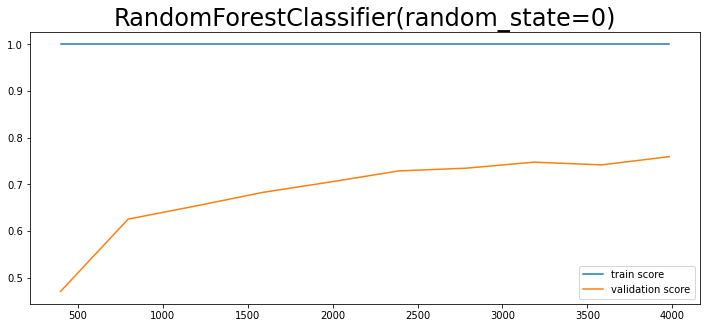

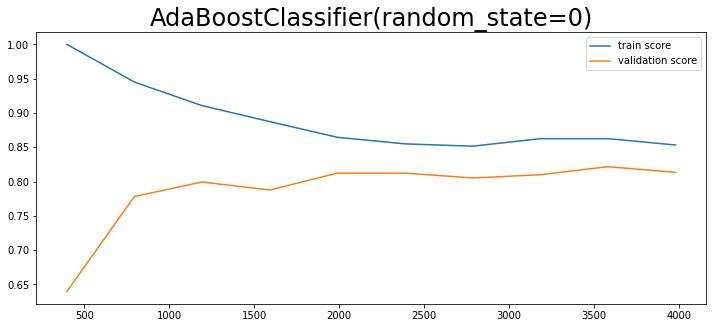

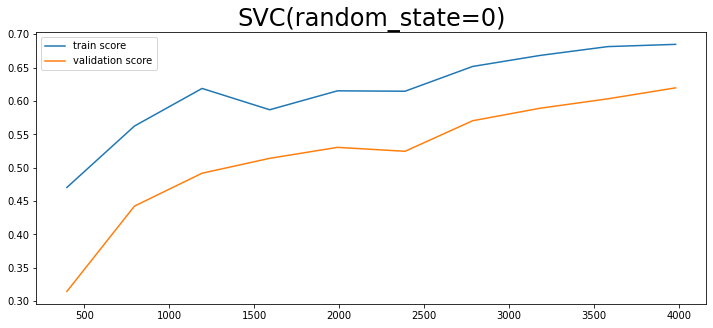

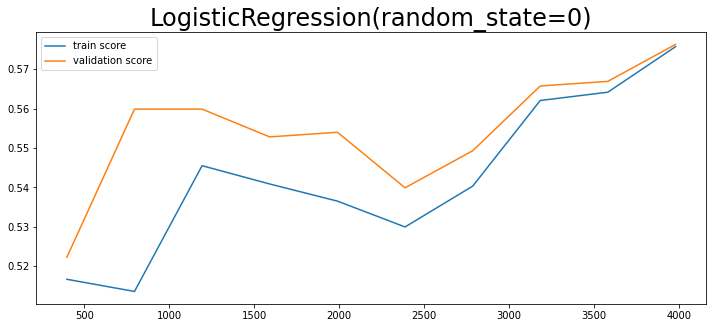

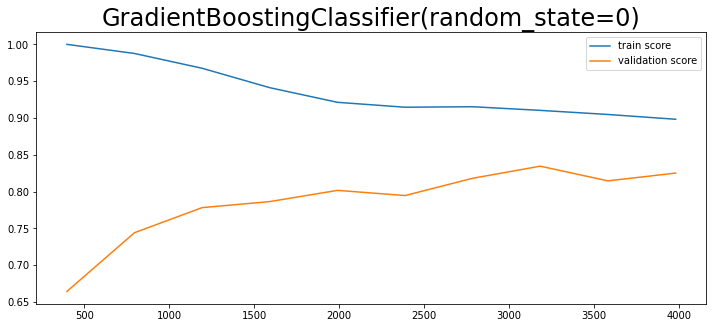

In [32]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

**Dans cet exemple le meilleur modèle est le Adaboost**

Nous pourions envisager de travailler avec:
- Le modèle de **`AdaBoost`**
- Le modèle de **`RandomForest`**

En nous bassant sur `l'accuracy` ***le taux de bien classé***

et le `recall` de bien classé pour ***la modalité positive***

Le Modèle SVM n'arrive pas à avoir de bonne performance

## Feature selection

In [33]:
gd_boost.feature_importances_

array([2.07033311e-02, 4.97596297e-04, 4.85747013e-05, 5.78768964e-04,
       1.26117115e-03, 1.45699215e-03, 8.68971092e-02, 2.09646555e-02,
       1.38454095e-02, 4.55793253e-04, 1.86261324e-01, 2.47957868e-03,
       4.63829511e-02, 1.98787242e-01, 3.12076635e-01, 1.03502445e-01,
       2.28387219e-03, 2.45009842e-04, 6.02766242e-06, 1.26551215e-03])

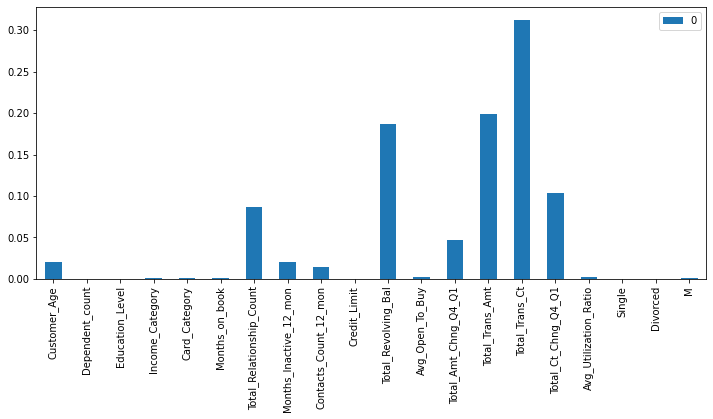

In [34]:
pd.DataFrame(gd_boost.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 5))

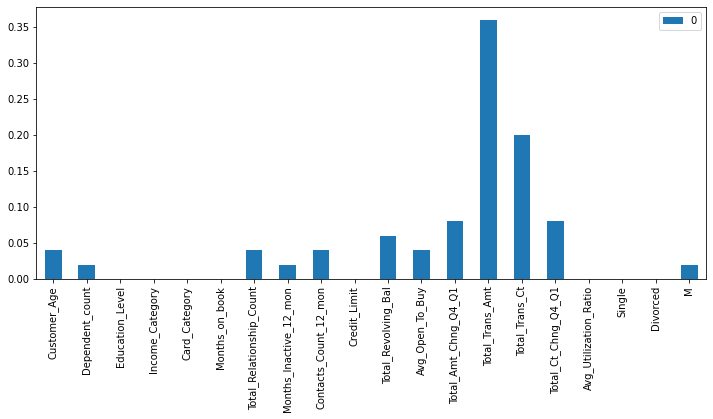

In [35]:
pd.DataFrame(model_boost.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 5))

In [36]:
feature_model_boost = pd.DataFrame(model_boost.feature_importances_, index=X_train.columns)
best_data1 = feature_model_boost.T
b = pd.DataFrame(best_data1>=0.04)
b[b == True].dropna(1)

,Customer_Age,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,True,True,True,True,True,True,True,True,True


In [37]:
feature_gd_boost = pd.DataFrame(gd_boost.feature_importances_, index=X_train.columns)
best_data2 = feature_model_boost.T
a = pd.DataFrame(best_data2>=0.04)
a = a[a==True].dropna(1)
a

,Customer_Age,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,True,True,True,True,True,True,True,True,True


In [38]:
a.columns

Index(['Customer_Age', 'Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

Selection des variables les plus pertinantes pour les deux meilleurs modèles

In [39]:
X_train = X_train[a.columns]
X_test = X_test[a.columns]
X_test

,Customer_Age,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
6432,1.209404,1.408135,0.508654,0.595922,-0.549165,1.041278,0.303349,0.276105,0.090206
7601,0.214526,-0.530637,-1.299214,-0.545775,-0.565366,0.816512,-0.046934,0.569730,-0.499806
326,1.209404,-0.530637,-0.395280,0.235322,-0.294330,-0.346985,-0.762555,-0.646719,-0.546164
7495,0.090167,0.115620,0.508654,-0.325748,-0.658302,-0.369021,0.068573,1.240875,-0.820097
693,-1.153430,0.761878,-0.395280,1.655720,-0.800607,0.582931,-0.738527,-0.017521,-0.786382
...,...,...,...,...,...,...,...,...,...
1235,0.090167,-0.530637,1.412589,0.485908,-0.197781,-0.840589,-0.843323,-0.856452,0.208208
5883,-1.899588,0.115620,0.508654,0.731605,-0.694973,-0.413093,-0.006695,1.031142,-0.263801
594,-0.282912,1.408135,0.508654,-1.420995,-0.016726,-0.346985,-1.001963,-1.947061,-0.887527
7078,-0.531632,0.761878,-0.395280,-0.070272,-0.665198,-0.126626,-0.056487,0.527784,0.001704


RandomForest
Entraînement: 1.0
Test: 0.9678147939017504
      0    1
0  1494   16
1    41  220
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1510
           1       0.93      0.84      0.89       261

    accuracy                           0.97      1771
   macro avg       0.95      0.92      0.93      1771
weighted avg       0.97      0.97      0.97      1771

AdaBoost
Entraînement: 0.9566854990583804
Test: 0.9525691699604744
      0    1
0  1478   32
1    52  209
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1510
           1       0.87      0.80      0.83       261

    accuracy                           0.95      1771
   macro avg       0.92      0.89      0.90      1771
weighted avg       0.95      0.95      0.95      1771

SVM
Entraînement: 0.9401129943502825
Test: 0.9418407679277244
      0    1
0  1487   23
1    80  181
              precision    recall  f1-score 

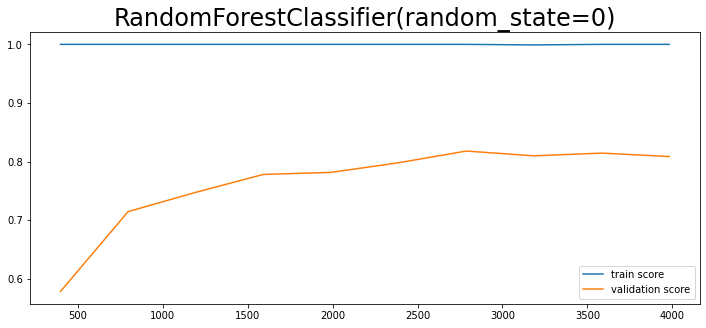

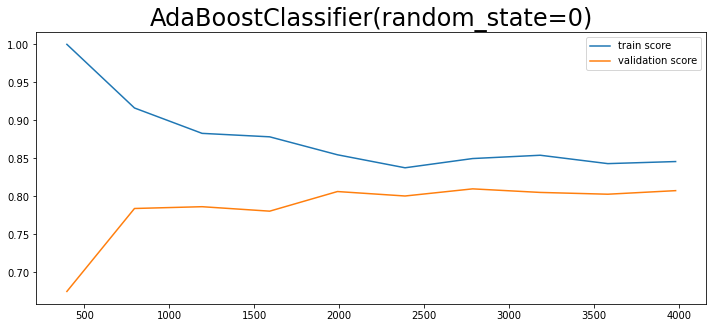

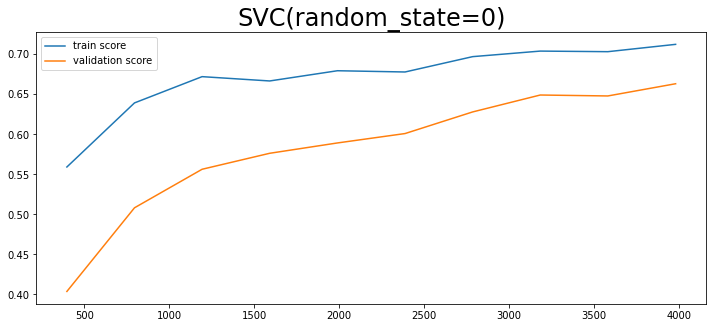

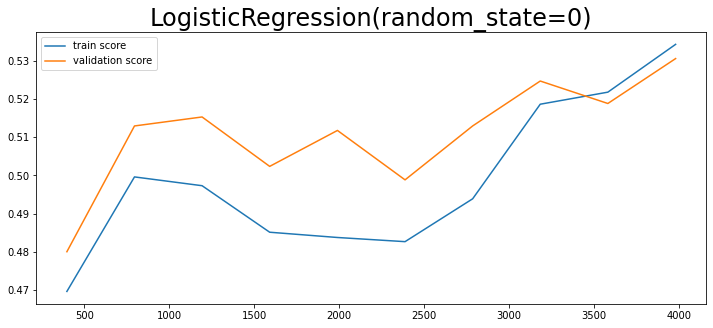

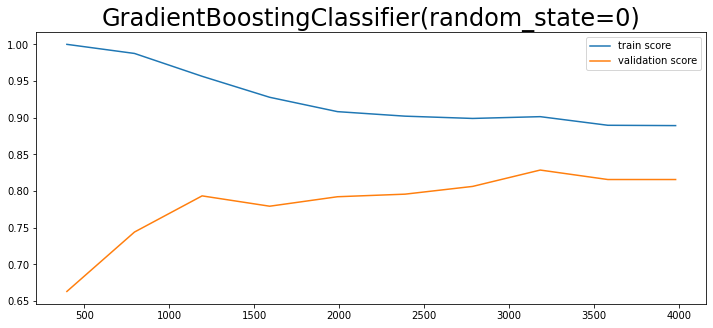

In [40]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [41]:
print(gd_boost)

GradientBoostingClassifier(random_state=0)


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# construction des dictionnaires d’hyperparamètres
dico_param_rf={
    "learning_rate":[0.001,0.01,0.1,0.25,0.5, 0.3, 0.4],
    "max_depth":[1,2,3,4,5,6,7,8],
#     "max_features": [1,2,3,4,5,6,7,8]
}
dico_param_knn={"n_neighbors":[2,5,10,50],"weights":['uniform','distance']}

modele_grid_gd=GridSearchCV(gd_boost,dico_param_rf,
                            scoring="recall",cv=5)

# modele_grid_knn=GridSearchCV(modele_knn, dico_param_knn,
#                              scoring="roc_auc",cv=5)

In [44]:
# estimation des paramètres et des meilleurs modèles
modele_grid_gd.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.3,
                                           0.4],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='recall')

In [45]:
# estimation des paramètres et des meilleurs modèles
# modele_grid_knn.fit(x_train,y_train)

In [46]:
# affichage des AUC pour la combinaison obtenant
# les meilleurs résultats
print("Meilleurs paramètres GD:", modele_grid_gd.best_params_)
print("AUC - GD:", modele_grid_gd.best_score_)
# print("Meilleurs paramètres kNN:", modele_grid_knn.best_params_)
# print("AUC - kNN:", modele_grid_knn.best_score_)

Meilleurs paramètres GD: {'learning_rate': 0.4, 'max_depth': 4}
AUC - GD: 0.8649673202614379


In [47]:
print("Meilleurs paramètres GD:", modele_grid_gd.best_estimator_)

Meilleurs paramètres GD: GradientBoostingClassifier(learning_rate=0.4, max_depth=4, random_state=0)


In [50]:
gd_boost = GradientBoostingClassifier(learning_rate=0.4, max_depth=4, random_state=0)

Entraînement: 1.0
Test: 0.9712027103331451
      0    1
0  1492   18
1    33  228
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1510
           1       0.93      0.87      0.90       261

    accuracy                           0.97      1771
   macro avg       0.95      0.93      0.94      1771
weighted avg       0.97      0.97      0.97      1771



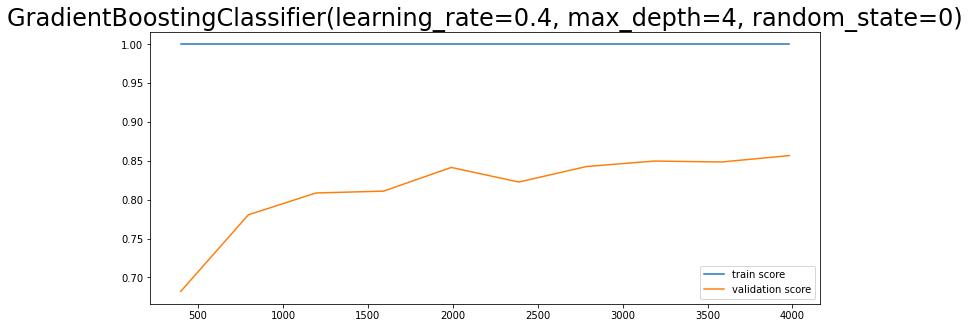

In [51]:
gd_boost.fit(X_train, Y_train)
ypred = gd_boost.predict(X_test)

print(f"Entraînement: {gd_boost.score(X_train, Y_train)}\nTest: {gd_boost.score(X_test, Y_test)}")
print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
print(classification_report(Y_test, ypred))

N, train_score, val_score = learning_curve(gd_boost, X_train, Y_train,
                                           cv=4, scoring='recall',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12, 5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title(gd_boost, fontsize=24)
plt.legend()

In [52]:
# on prédit grâce à ce modèle
y_predict = gd_boost.predict(X_test)

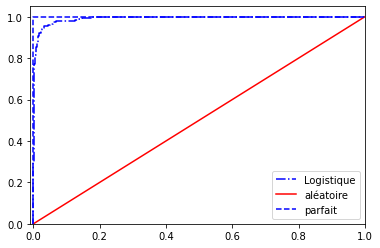

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve

# on extrait les probabilités d'appartenance
proba_ped = gd_boost.predict_proba(X_test)[:,1]

# cas du modèle RF
fpr, tpr, _ = roc_curve(Y_test, proba_ped)
plt.plot(fpr,tpr,"b-.", label="gd_boost")

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [54]:
from sklearn.metrics import roc_auc_score
auc_modele = roc_auc_score(Y_test, gd_boost.predict_proba(X_test)[:,1])

print("Aire sous la courbe ROC pour le modèle logistique :" , auc_modele)

Aire sous la courbe ROC pour le modèle logistique : 0.99230925376164
